In [1]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    raise Warning('Please install seaborn to run this notebook')

def make_percentage(l):
    sum = 0
    for i in l:
        sum += i
    return pd.Series([x/sum for x in l], index=l.index)

In [2]:
csv = pd.read_csv("data_with_mean&max.csv").drop(['E','N','A','C','O','maximum'], axis=1)
csv

,race,age,engnat,gender,hand,source,country,personality_type
0,3,53,1,1,1,1,US,E
1,13,46,1,2,1,1,US,A
2,1,14,2,2,1,1,PK,N
3,3,19,2,2,1,1,RO,N
4,11,25,2,2,1,2,US,A
...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,N
19715,3,37,1,2,1,2,US,C
19716,5,16,2,1,1,2,US,N
19717,12,16,1,1,1,5,NG,N


Dans cette partie nous allons à chaque fois comparer les résultats en USA vs le reste du monde. Pour voir si les USA on une réelle différence de personalité.

Pour cela coupons notre DataFramme en deux, une avec uniquement les résultats des USA et l'autre avec le reste

In [3]:
usa = csv[csv['country'] == 'US']
monde = csv[csv['country'] != 'US']
print("""Il y a {} réponse au US contre {} ailleur dans le monde""".format(len(usa), len(monde)))

Il y a 8753 réponse au US contre 10966 ailleur dans le monde


<AxesSubplot:ylabel='rép'>

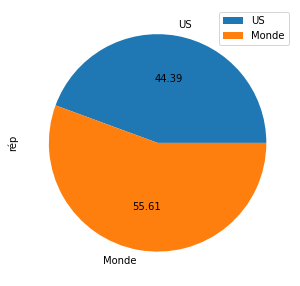

In [4]:
réponses = pd.DataFrame({'rép': [8753, 10966]}, index=['US','Monde'])
réponses.plot.pie(y='rép', figsize=(5, 5),autopct='%.2f')

<AxesSubplot:title={'center':'Monde'}, ylabel='personality_type'>

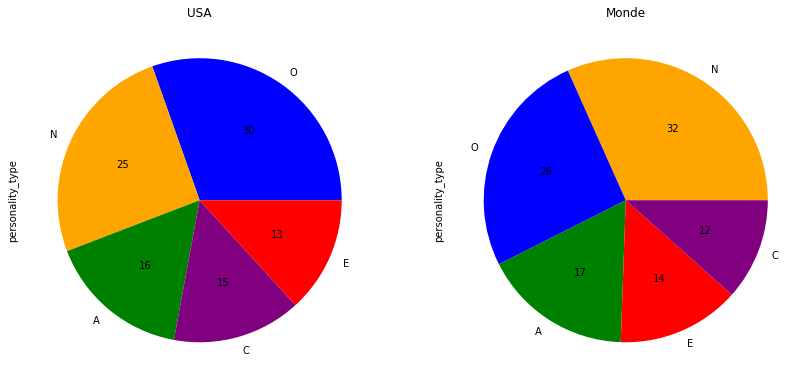

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
colorsDict = {'E':'red','N':'orange','A':'green','C':'purple','O':'blue'}

usa['personality_type'].value_counts().plot.pie(
    ax=axes[0], 
    title='USA', 
    autopct='%.0f', 
    colors=[colorsDict[x] for x in usa['personality_type'].value_counts().index] #Créer un liste des couleurs dans le même ordre que l'index
)                                                                                #Pour avoir les mêmes couleurs sur les deux
monde['personality_type'].value_counts().plot.pie(
    ax=axes[1], 
    title='Monde', 
    autopct='%.0f', 
    colors=[colorsDict[x] for x in monde['personality_type'].value_counts().index] 
)

<AxesSubplot:>

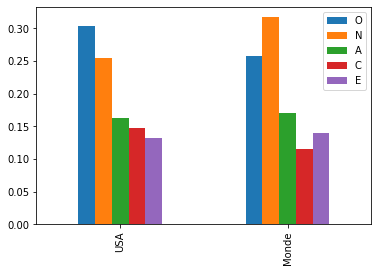

In [6]:
usa_series = make_percentage(usa['personality_type'].value_counts())
monde_series = make_percentage(monde['personality_type'].value_counts())
pd.DataFrame([usa_series,monde_series], index=["USA", "Monde"]).plot.bar()

On peut observer quelques légères variations. Les USA aurait 5% de N en moins par rapport au reste du monde ainsi que 3% de C en plus. Ces valeurs ne sont pas assez pertinantes et surrement du au fait que plus de personne ont répondu dans le monde par rapport à dans les USA.

Y'a t-il des variations de personnalité entre les femmes et les hommes ?

In [7]:
usa[usa['gender'] == 1]['personality_type']

0        E
15       O
26       A
27       E
32       C
        ..
19701    E
19704    A
19713    A
19716    N
19718    C
Name: personality_type, Length: 2945, dtype: object

<AxesSubplot:title={'center':'Monde - Femme'}, ylabel='personality_type'>

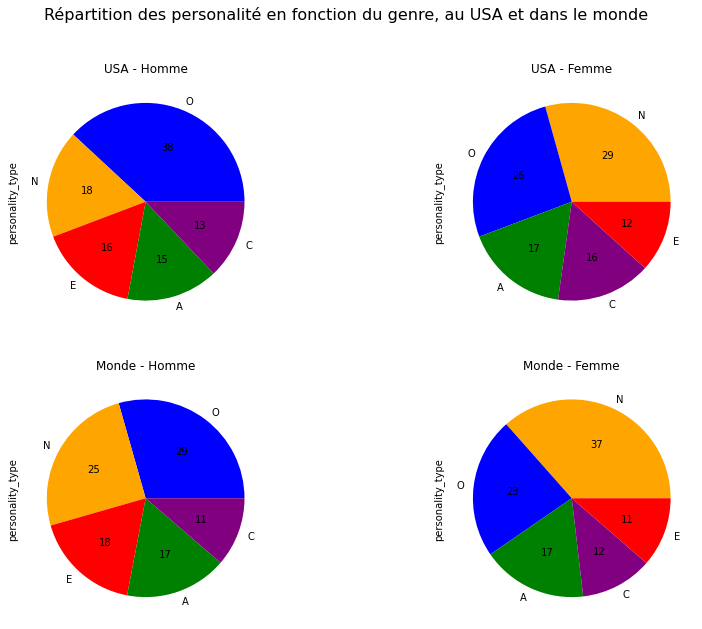

In [8]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Répartition des personalité en fonction du genre, au USA et dans le monde', fontsize=16)

usa[usa['gender'] == 1]['personality_type'].value_counts().plot.pie(ax=ax1, title="USA - Homme", autopct='%.0f', colors=[colorsDict[x] for x in usa[usa['gender'] == 1]['personality_type'].value_counts().index])

usa[usa['gender'] == 2]['personality_type'].value_counts().plot.pie(ax=ax2, title="USA - Femme", autopct='%.0f', colors=[colorsDict[x] for x in usa[usa['gender'] == 2]['personality_type'].value_counts().index])

monde[monde['gender'] == 1]['personality_type'].value_counts().plot.pie(ax=ax3, title="Monde - Homme", autopct='%.0f', colors=[colorsDict[x] for x in monde[monde['gender'] == 1]['personality_type'].value_counts().index])

monde[monde['gender'] == 2]['personality_type'].value_counts().plot.pie(ax=ax4, title="Monde - Femme", autopct='%.0f', colors=[colorsDict[x] for x in monde[monde['gender'] == 2]['personality_type'].value_counts().index])

In [9]:
USA_Homme = make_percentage(usa[usa['gender'] == 1]['personality_type'].value_counts())
USA_Femme = make_percentage(usa[usa['gender'] == 2]['personality_type'].value_counts())
Monde_Homme = make_percentage(monde[monde['gender'] == 1]['personality_type'].value_counts())
Monde_Femme = make_percentage(monde[monde['gender'] == 2]['personality_type'].value_counts())

<AxesSubplot:title={'center':'Répartition des personalité en fonction du genre, au USA et dans le monde'}>

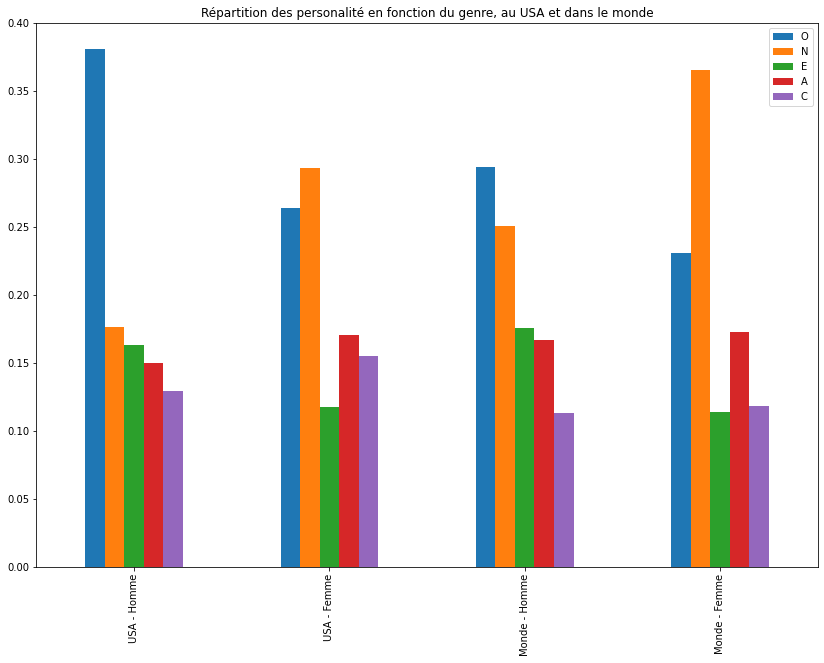

In [10]:
pd.DataFrame([USA_Homme, USA_Femme, Monde_Homme, Monde_Femme], index=["USA - Homme","USA - Femme","Monde - Homme","Monde - Femme"]).plot.bar(title='Répartition des personalité en fonction du genre, au USA et dans le monde', figsize=(14,10))

On constate que les hommes sont plus O alors que les femmes ont plutot un profil N, et cela au USA ou dans le monde. <br/>
On observe également un plus grand taux de d'Hommes de type O au Etat-Unis en comparaison avec le monde entier. Chez les femmes, la balance entre les profils O et N est plus équilibré que dans le monde entier, où le profil N l'emporte. 

Y'a t'il une corrélation entre l'age et la personalité ? 

In [11]:
filter = usa[["personality_type", "age"]]
filter = filter[filter["age"] <= 100]

bins = pd.IntervalIndex.from_tuples([(13,20), (20,30), (30,40), (40,50), (50,60)])
filter['age'] = pd.cut(filter['age'], bins)
filter

,personality_type,age
0,E,"(50, 60]"
1,A,"(40, 50]"
4,A,"(20, 30]"
5,C,"(30, 40]"
6,A,"(13, 20]"
...,...,...
19712,A,"(13, 20]"
19713,A,"(20, 30]"
19715,C,"(30, 40]"
19716,N,"(13, 20]"


In [12]:
crosstab = pd.crosstab(filter['age'], filter['personality_type']).apply(lambda r: (r/r.sum())*100, axis=1)
crosstab

personality_type,A,C,E,N,O
age,,,,,
"(13, 20]",14.589989,15.095847,13.977636,30.298190,26.038339
"(20, 30]",17.112971,15.732218,13.640167,24.769874,28.744770
"(30, 40]",18.897638,13.976378,10.925197,20.767717,35.433071
"(40, 50]",17.952128,12.632979,11.968085,17.154255,40.292553
"(50, 60]",16.833667,12.825651,12.024048,15.030060,43.286573


<AxesSubplot:title={'center':"Répartition des personnalités par catégorie d'âge aux Etat-Unis"}, xlabel='age'>

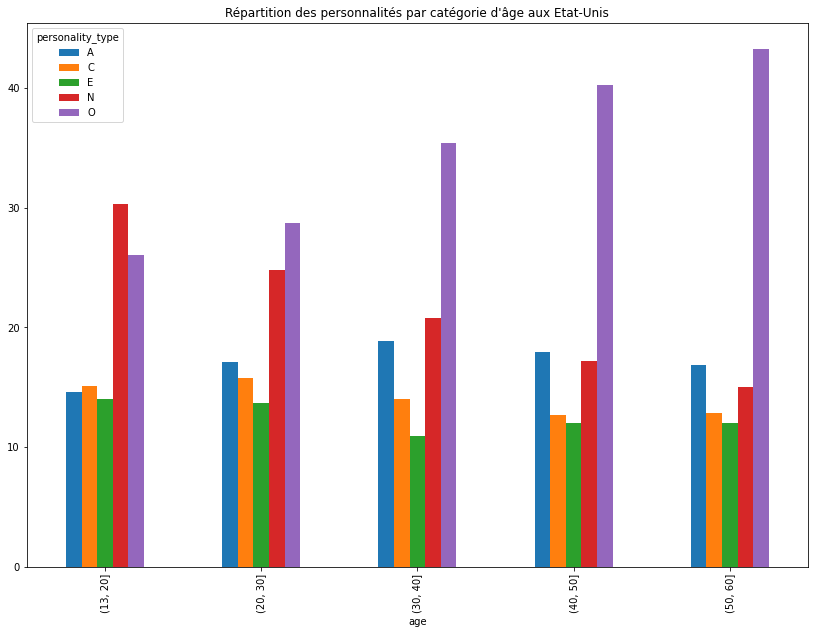

In [13]:
crosstab.plot.bar(title="Répartition des personnalités par catégorie d'âge aux Etat-Unis", stacked=False, figsize=(14, 10))



<AxesSubplot:title={'center':"Répartition des personnalités par catégorie d'âge aux Etat-Unis"}, xlabel='age'>

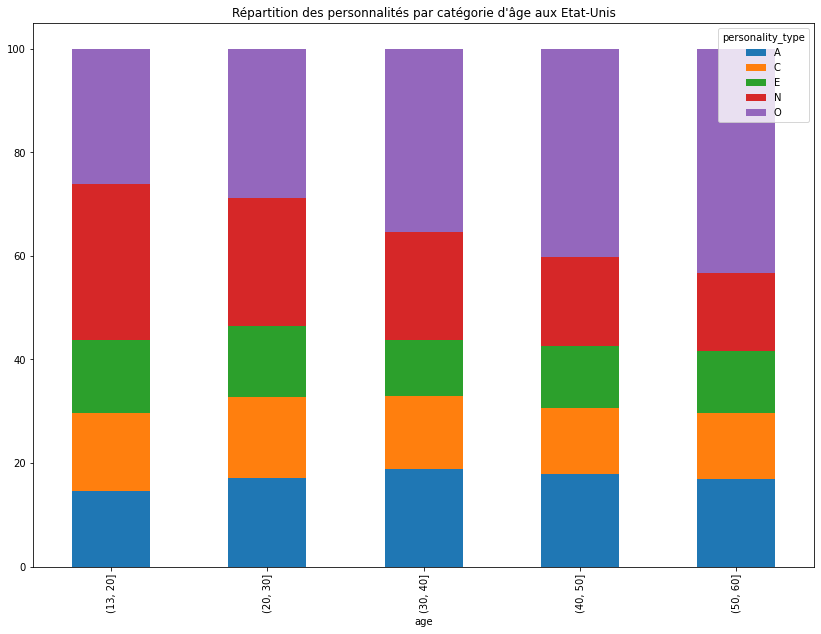

In [14]:
crosstab.plot.bar(title="Répartition des personnalités par catégorie d'âge aux Etat-Unis", stacked=True, figsize=(14, 10))

On peut remarquer de nettes variations sur les deux profils opposés O et N en fonction de l'âge ! En effet il s'emblerai que plus l'age augmente plus il y aurait de profil O, et de moins en moins de profil N.

<AxesSubplot:title={'center':"Répartition des personnalités par catégorie d'âge dans le monde"}, xlabel='age'>

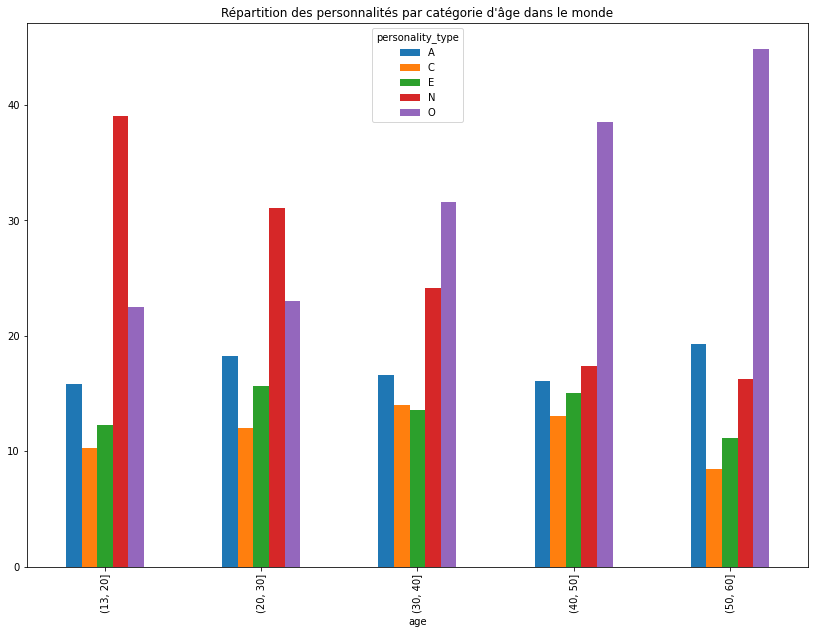

In [15]:
filter = monde[["personality_type", "age"]]
filter = filter[filter["age"] <= 100]
filter['age'] = pd.cut(filter['age'], bins)
crosstab = pd.crosstab(filter['age'], filter['personality_type']).apply(lambda r: (r/r.sum())*100, axis=1)
crosstab.plot.bar(title="Répartition des personnalités par catégorie d'âge dans le monde", stacked=False, figsize=(14, 10))


<AxesSubplot:title={'center':"Répartition des personnalités par catégorie d'âge dans le monde"}, xlabel='age'>

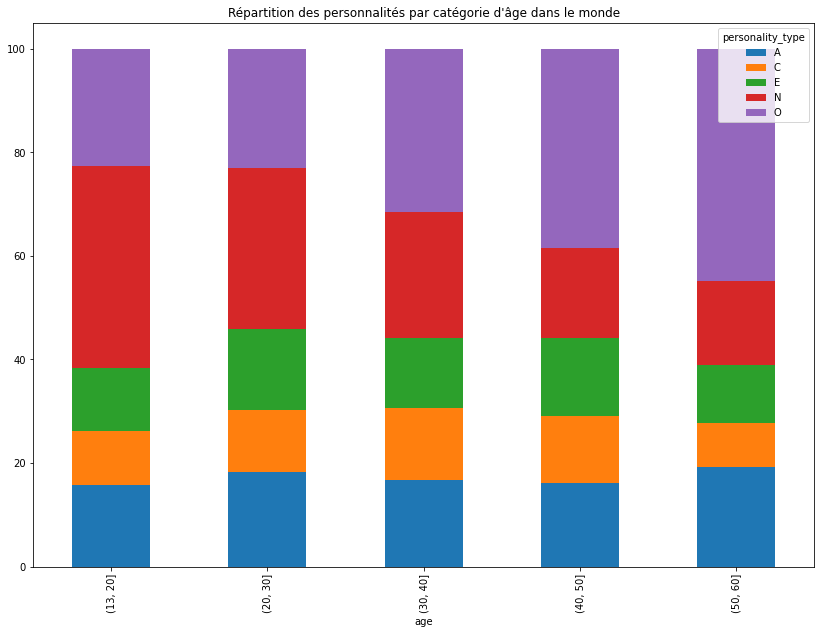

In [16]:
crosstab.plot.bar(title="Répartition des personnalités par catégorie d'âge dans le monde", stacked=True, figsize=(14, 10))

Y'a t-il une différence dans la répartion des personalités chez les différentes races ? 

Pour garder une pertinance statistique nous allons comparer uniquement les 2 races : Caucasien (europeen) et South East Asian (Chinese, Thai, Malay, Filipino, etc)

<AxesSubplot:title={'center':'Europeen'}, ylabel='personality_type'>

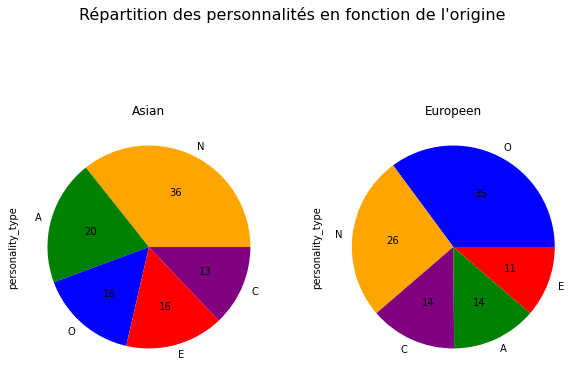

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
fig.suptitle("Répartition des personnalités en fonction de l'origine", fontsize=16,)

caucasien = csv[csv['race'] == 3]['personality_type'].value_counts()
asian = csv[csv['race'] == 11]['personality_type'].value_counts()

asian.plot.pie(ax=axes[0], title='Asian', autopct='%.0f',colors=[colorsDict[x] for x in asian.index])
caucasien.plot.pie(ax=axes[1],title="Europeen", autopct='%.0f', colors=[colorsDict[x] for x in caucasien.index])

<AxesSubplot:>

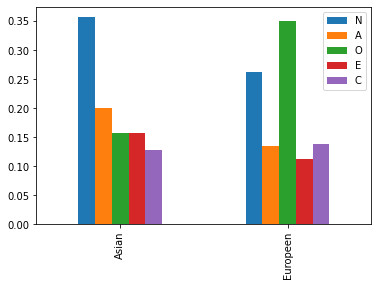

In [18]:
pd.DataFrame([make_percentage(asian),make_percentage(caucasien)], index=['Asian','Europeen']).plot.bar()